In [65]:
import numpy as np
import gudhi
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

In [66]:
s=[984,1662,1170,1476,1394,1466,1034,1082,1178,928]  

In [67]:
avg=[]
Tp_above=[]
Tp_below=[]
Tp=[]
for idx in range(1,s[4]):
    file_name = ('../simulation_data/New_data/DATA/s13/' + 'force_contact_' + '%06d.dat' % idx)
    data=np.loadtxt(file_name)
    id1 = data[:,0]
    id2 = data[:,1]
    force = np.sqrt((data[:,4])**2+(data[:,5])**2)
    #print(force)
    avg.append(np.average(force))
average=np.array(avg) ##space average

print(average)


[0.39129744 0.71249829 0.35165645 ... 0.37357653 0.42318852 3.11660701]


In [68]:
s_t_avg=np.average(average)
print(s_t_avg)

1.3799395120975104


In [69]:

def trivialTriangle(particle_ids, force):
# particle_ids: a list of particle ids in contact; dimension: N*2
# force: list of contact force;dimension: N*1
# trivial: list, n*4
    trivialLoops = []
    id_len = len(particle_ids)
    for idx,item in enumerate(particle_ids):
        id1 = item[0]
        id2 = item[1]
        force12 = force[idx]    
        id1_set = set()
        id2_set = set()   
        for i in range(idx+1,id_len):
            l2 = particle_ids[i]
            if id1 in l2:
                id3 = l2[l2!=id1]
                id1_set.add(id3)
                
            if id2 in l2:
                id3 = l2[l2!=id2]
                id2_set.add(id3)
        #print(id1_set)
        
        common_id3 = id1_set & id2_set
        len_common = len(common_id3)
        #print(common_id3)
        if len_common > 0:
            #print(len_common)
            for id3 in common_id3:
                #print(id3)
                for j in range(idx+1,len(particle_ids)):
                    if set([id1,id3]) == set(particle_ids[j]):
                        force13 = force[j]
                    if set([id2,id3]) == set(particle_ids[j]):
                        force23 = force[j]
                        
                fmin = min(force12,force13,force23)
                trivialLoops.append([id1,id2,id3,fmin])
    return trivialLoops





In [80]:

###107,108
TP_1=[]
TP_above=[]
TP_below=[]
for idx in range(1,s[4]):
    file_name = ('../simulation_data/New_data/DATA/s13/' + 'force_contact_' + '%06d.dat' % idx)
    data=np.loadtxt(file_name)
    #id_1 = data[:,0]
    #id_2 = data[:,1]
    force = np.sqrt((data[:,4])**2+(data[:,5])**2)
    particle_id=[]
    cond_f=[]
    id1=[]
    id2=[]
    for i in range(0,len(force)):
        if force[i]!=0.0:
            if (data[i,0]>0 and data[i,1]>0):
                cond_f.append(np.sqrt((data[i,4])**2+(data[i,5])**2))
                id1.append(data[i,0])
                id2.append(data[i,1])
    cond_force=np.array(cond_f)
    id_1=np.array(id1)
    id_2=np.array(id2)
    for i in range(0,len(id_1)):
        particle_id.append([id_1[i],id_2[i]])
    pid=np.array(particle_id)
    #print(pid)
    particle_ids=pid.tolist()
    #print(particle_ids)
    contact_force=cond_force.tolist()
    #print(contact_force)
    # find the trivial loops
    trivialLoops = trivialTriangle(particle_ids, contact_force)
    #print(trivialLoops)
    # construct simplex trees
    contact_length = len(contact_force)
    loops_length = len(trivialLoops)
    
    st = gudhi.SimplexTree()
    for i in range(contact_length):
        st.insert(particle_ids[i], filtration = - contact_force[i])
            
    for i in range(loops_length):
        st.insert(trivialLoops[i][0:3], filtration = -trivialLoops[i][3])

    st.initialize_filtration()
    diag = st.persistence(11, 0.0, persistence_dim_max = True)
    #B0 = st.persistence_intervals_in_dimension(0)
    B1 = st.persistence_intervals_in_dimension(1)
    #print(B1)
    B1_births = [] 
    B1_deaths = [] 
    for ind, item in enumerate(B1):
        B1_births.append(-item[0])
        B1_deaths.append(-item[1])
    for i, item in enumerate(B1_deaths):
        if np.isinf(item):
            B1_deaths[i] = 0.0
            
    births_np = np.array(B1_births)
    deaths_np = np.array(B1_deaths)
    b_above=[]
    b_below=[]
    total_persistence=np.sum(births_np-deaths_np)
    TP_1.append(total_persistence)
    for i in range(0,len(births_np)):
        if births_np[i]>average[i]:
            b_above.append((births_np[i]))
        if births_np[i]<average[i]:
            b_below.append(np.sum(births_np[i]))
    TP_above.append(np.sum(b_above))
    TP_below.append(np.sum(b_below))
    #print(TP_below)

In [75]:
Intruder_Info_03=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s03.log')
Intruder_Info_05=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s05.log')
Intruder_Info_07=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s07.log')
Intruder_Info_11=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s11.log')
Intruder_Info_13=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s13.log')
Intruder_Info_17=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s17.log')
Intruder_Info_19=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s19.log')
Intruder_Info_23=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s23.log')
Intruder_Info_29=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s29.log')
Intruder_Info_31=np.loadtxt('../simulation_data/New_data/DATA/cfIntruder-s31.log')
#print(Intruder_Info)
Intruder_Velocity_03=Intruder_Info_03[:,8]
Intruder_Velocity_05=Intruder_Info_05[:,8]
Intruder_Velocity_07=Intruder_Info_07[:,8]
Intruder_Velocity_11=Intruder_Info_11[:,8]
Intruder_Velocity_13=Intruder_Info_13[:,8]
Intruder_Velocity_17=Intruder_Info_17[:,8]
Intruder_Velocity_19=Intruder_Info_19[:,8]
Intruder_Velocity_23=Intruder_Info_23[:,8]
Intruder_Velocity_29=Intruder_Info_29[:,8]
Intruder_Velocity_31=Intruder_Info_31[:,8]
Intruder_angF_03=Intruder_Info_03[:,10]
Intruder_angF_05=Intruder_Info_05[:,10]
Intruder_angF_07=Intruder_Info_07[:,10]
Intruder_angF_11=Intruder_Info_11[:,10]
Intruder_angF_13=Intruder_Info_13[:,10]
Intruder_angF_17=Intruder_Info_17[:,10]
Intruder_angF_19=Intruder_Info_19[:,10]
Intruder_angF_23=Intruder_Info_23[:,10]
Intruder_angF_29=Intruder_Info_29[:,10]
Intruder_angF_31=Intruder_Info_31[:,10]



In [72]:
total_persist=pd.read_csv('../simulation_data/PD_files/B1/s13/total_persistence.csv')

In [81]:
## plot in subplots for space average
"""
| 03 | 456 - 947 | 983 |
| 05 | 370 - 1200 | 1661 |
| 07 | 816 - 1400 | 1169 |
| 11 | 285 - 1022 | 1475 |
| 13 | 504 - 1200 | 1393 |
| 17 | 230 - 962 | 1465 |
| 19 | 417 - 933 | 1033 |
| 23 | 375 -915 | 1081 |
| 29 | 257 - 845 | 1177 |
| 31 | 368 - 831 | 927 |
"""
time=np.linspace(504,1200,1392)
#time2=np.linspace(1000,1200,4000)
fig = plt.figure(figsize=(10,10))    
ax1 = fig.add_subplot(5,1,1)
ax1.plot(time,total_persist,color='red',label='TP')
ax1.set_xlabel('time')
ax1.set_ylabel('TP', color='red')
#ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor='red')
ax2 = fig.add_subplot(5,1,2)
ax2.plot(time,TP_above[0:1392],color='blue',label='TP_aboveavg')
ax2.set_xlabel('time')
ax2.set_ylabel('TP_ab_avgF', color='blue')
#ax2.set_xscale('log')
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='blue')
ax3 = fig.add_subplot(5,1,3)
ax3.plot(time,TP_below[0:1392],color='green',label='TP_belowavg')
ax3.set_xlabel('time')
ax3.set_ylabel('TP_bel_avgF', color='green') # instantiate a second axes that shares the same x-axis
#ax3.set_xscale('log')
#ax3.set_yscale('log')
ax3.tick_params(axis='y', labelcolor='green')
ax4 = fig.add_subplot(5,1,4)
ax4.plot(time, abs(Intruder_Velocity_13[0:1392]),color='magenta', label='tot_force')
ax4.set_xlabel('time')
ax4.set_ylabel('velocity', color='magenta')  # we already handled the x-label with ax1
ax4.tick_params(axis='y', labelcolor='magenta') #ax4.tick_params(axis='y', labelcolor='magenta')
#ax4.set_yscale('log')  #ax5=ax4.twinx()
ax5 = fig.add_subplot(5,1,5)
ax5.plot(time,abs(Intruder_angF_13[0:1392]),color='black', label='black')
ax5.set_ylabel('ang_force')
#ax5.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.title('Total Peristence_all vs total force')
#plt.legend(loc='\n'+'total force')
#plt.savefig('G:/PD_0/' + ('total persistence for PD_0_90'), dpi=800)
plt.savefig('../simulation_data/New_data/Results/B1/'+'TP_above_below_13_peravg_B1' )
plt.close()
plt.show()
#plt.plot(TP_above)

In [50]:
TP_above_st=[]
TP_below_st=[]
for i in range(0,len(TP_1)):
    if TP_1[i]>s_t_avg:
        TP_above_st.append(TP_1[i])
    if TP_1[i]<s_t_avg:
        TP_below_st.append(TP_1[i])
print(len(TP_above_st))
print(len(TP_below_st))

1360
33


ValueError: x and y must have same first dimension, but have shapes (1392,) and (1360,)

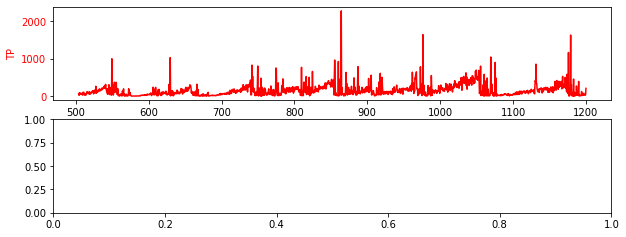

In [49]:
## plot in subplots for space average
"""
| 03 | 456 - 947 | 983 |
| 05 | 370 - 1200 | 1661 |
| 07 | 816 - 1400 | 1169 |
| 11 | 285 - 1022 | 1475 |
| 13 | 504 - 1200 | 1393 |
| 17 | 230 - 962 | 1465 |
| 19 | 417 - 933 | 1033 |
| 23 | 375 -915 | 1081 |
| 29 | 257 - 845 | 1177 |
| 31 | 368 - 831 | 927 |
"""
time=np.linspace(504,1200,1392)
#time2=np.linspace(1000,1200,4000)
fig = plt.figure(figsize=(10,10))    
ax1 = fig.add_subplot(5,1,1)
ax1.plot(time,total_persist,color='red',label='TP')
ax1.set_xlabel('time')
ax1.set_ylabel('TP', color='red')
#ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor='red')
ax2 = fig.add_subplot(5,1,2)
ax2.plot(time,TP_above_st,color='blue',label='TP_aboveavg')
ax2.set_xlabel('time')
ax2.set_ylabel('TP_ab_avgF', color='blue')
#ax2.set_xscale('log')
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='blue')
ax3 = fig.add_subplot(5,1,3)
ax3.plot(time,TP_below_st,color='green',label='TP_belowavg')
ax3.set_xlabel('time')
ax3.set_ylabel('TP_bel_avgF', color='green') # instantiate a second axes that shares the same x-axis
#ax3.set_xscale('log')
#ax3.set_yscale('log')
ax3.tick_params(axis='y', labelcolor='green')
ax4 = fig.add_subplot(5,1,4)
ax4.plot(time, abs(Intruder_Velocity_13[0:1392]),color='magenta', label='tot_force')
ax4.set_xlabel('time')
ax4.set_ylabel('velocity', color='magenta')  # we already handled the x-label with ax1
ax4.tick_params(axis='y', labelcolor='magenta') #ax4.tick_params(axis='y', labelcolor='magenta')
#ax4.set_yscale('log')  #ax5=ax4.twinx()
ax5 = fig.add_subplot(5,1,5)
ax5.plot(time,abs(Intruder_angF_13[0:1392]),color='black', label='black')
ax5.set_ylabel('ang_force')
#ax5.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.title('Total Peristence_all vs total force')
#plt.legend(loc='\n'+'total force')
#plt.savefig('G:/PD_0/' + ('total persistence for PD_0_90'), dpi=800)
#plt.savefig('../simulation_data/New_data/Results/'+'TP_above_below_03_peravg' )
#plt.close()
plt.show()
#plt.plot(TP_above)